# Source of reference: https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3

In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#show datasets avaialble
dir(sm.datasets)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'anes96',
 'cancer',
 'ccard',
 'check_internet',
 'china_smoking',
 'clear_data_home',
 'co2',
 'committee',
 'copper',
 'cpunish',
 'elnino',
 'engel',
 'fair',
 'fertility',
 'get_data_home',
 'get_rdataset',
 'grunfeld',
 'heart',
 'longley',
 'macrodata',
 'modechoice',
 'nile',
 'randhie',
 'scotland',
 'spector',
 'stackloss',
 'star98',
 'statecrime',
 'strikes',
 'sunspots',
 'utils',
 'webuse']

In [3]:
nile= sm.datasets.nile.load_pandas()

In [4]:
#load the dataset into Dataframe
data=nile.data

In [5]:
data.volume.values

array([ 1120.,  1160.,   963.,  1210.,  1160.,  1160.,   813.,  1230.,
        1370.,  1140.,   995.,   935.,  1110.,   994.,  1020.,   960.,
        1180.,   799.,   958.,  1140.,  1100.,  1210.,  1150.,  1250.,
        1260.,  1220.,  1030.,  1100.,   774.,   840.,   874.,   694.,
         940.,   833.,   701.,   916.,   692.,  1020.,  1050.,   969.,
         831.,   726.,   456.,   824.,   702.,  1120.,  1100.,   832.,
         764.,   821.,   768.,   845.,   864.,   862.,   698.,   845.,
         744.,   796.,  1040.,   759.,   781.,   865.,   845.,   944.,
         984.,   897.,   822.,  1010.,   771.,   676.,   649.,   846.,
         812.,   742.,   801.,  1040.,   860.,   874.,   848.,   890.,
         744.,   749.,   838.,  1050.,   918.,   986.,   797.,   923.,
         975.,   815.,  1020.,   906.,   901.,  1170.,   912.,   746.,
         919.,   718.,   714.,   740.])

In [6]:
tp=[]

for i in range(len(data)):
    
        timepoint=data.iloc[i]['year'].astype(int).astype(str) + '-'+'01-01'
        tp.append(timepoint)

In [7]:
vol_data=pd.DataFrame({'Volume':data.volume.values}, index=pd.to_datetime(tp))

In [8]:
vol_data.head()

,Volume
1871-01-01,1120.0
1872-01-01,1160.0
1873-01-01,963.0
1874-01-01,1210.0
1875-01-01,1160.0


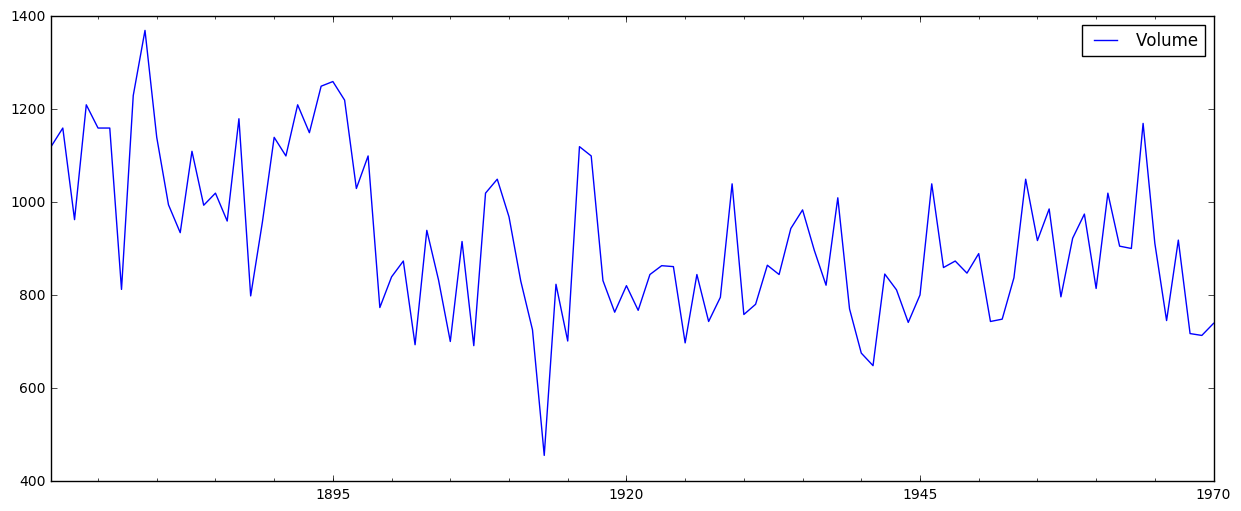

In [9]:
vol_data.plot(figsize=(15, 6))
plt.show()

# look at decompositional element. 

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

#take the log of the volumne data to make it more of a normal distribution
decomposition = seasonal_decompose(np.log(vol_data))
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


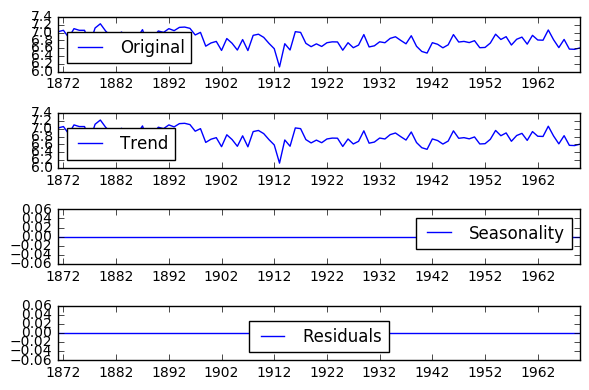

In [11]:
plt.subplot(411)
plt.plot(np.log(vol_data), label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


# No seasonality detected. To find optimal parameters for sarimax time series model, set up a grid search.

In [12]:
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [41]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(np.log(vol_data),
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:500.3253707784356
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:-15.002974230655422
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:-10.845892328459849
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:-30.436467640234355
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:-11.555765139808228
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:-15.858251913484871
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:531.888905163303
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:386.81945792953263
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:-11.153708233957529
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:-24.96722312324776
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:-12.820225589303263
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:-7.2492131661396435
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:-17.44245615456768
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:-21.662877329308497
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:-37.555668300937036
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:-15.491188733740213
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:-38.748298067057696
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:-3

Pick the model with the lowest AIC value. Lower AIC corresponds a model that fits the data very well while using fewer features.
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:-73.57350719870367

In [44]:
mod = sm.tsa.statespace.SARIMAX(np.log(vol_data),
                                order=(1,1,1),
                                seasonal_order=(0, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

In [45]:
results = mod.fit()

In [46]:
print(results.summary().tables[1])


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2268      0.132      1.717      0.086      -0.032       0.486
ma.L1         -1.1422      0.070    -16.356      0.000      -1.279      -1.005
sigma2         0.0196      0.004      5.559      0.000       0.013       0.026


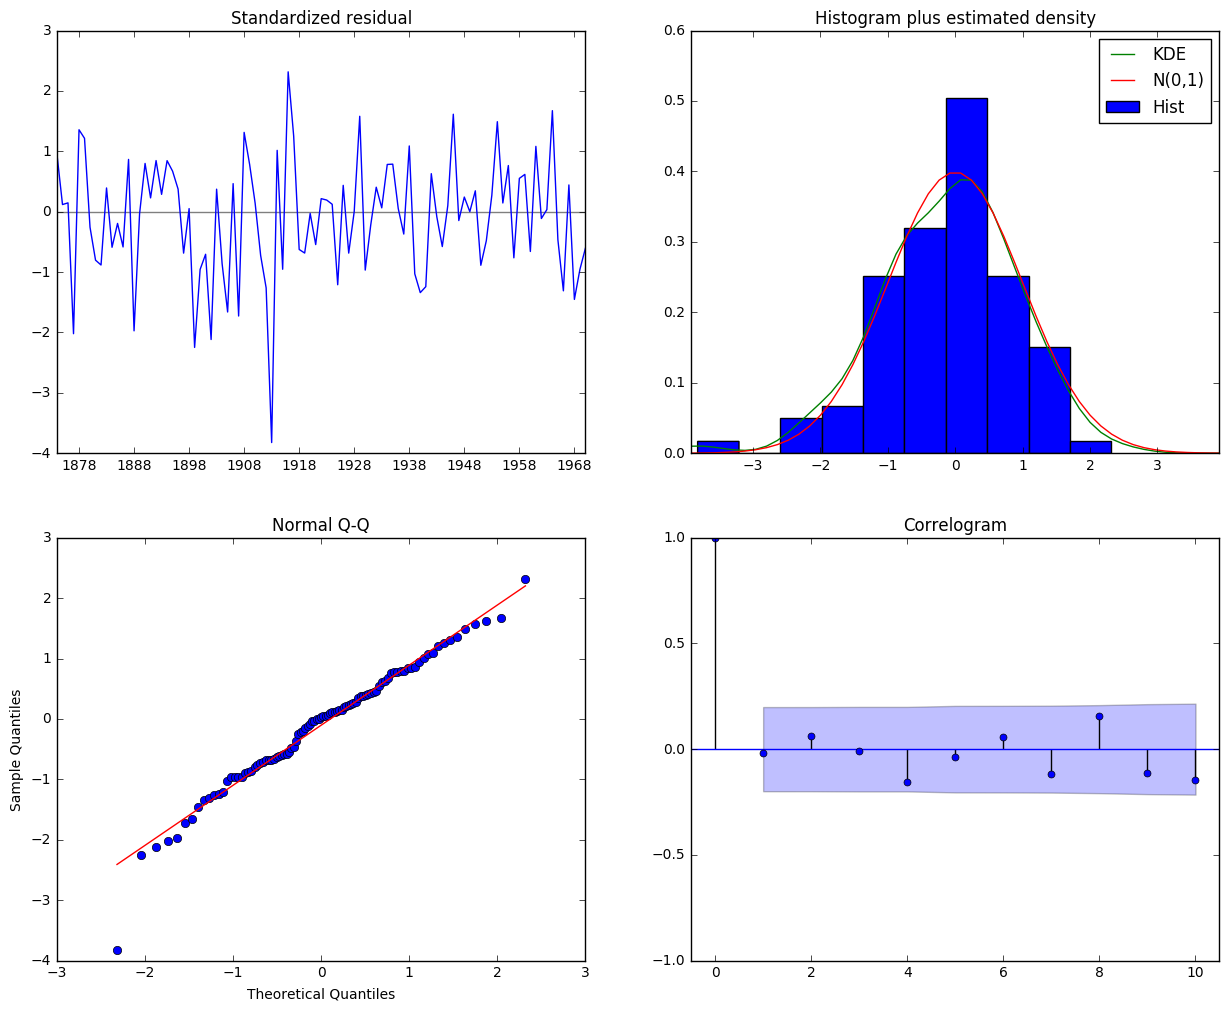

In [47]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

standardized residual seems be stationary with mean centered around 0. In the histogram plot, the KDE should follow closely with the normal distribution N(0,1). Q-Q plot should be linear for normally distributed residuals. The correlogram in the bottom right shows whether or not the time series residuals have correlation with the previous data points. This plot indicates no correlation since all points are within the light blue confidence interval.

# In sample one-step-ahead prediction

In [48]:
pred = results.get_prediction(start=str('1930-01-01'), dynamic=False)
pred_ci = pred.conf_int()

In [49]:
vol_data.index=pd.to_datetime(vol_data.index)

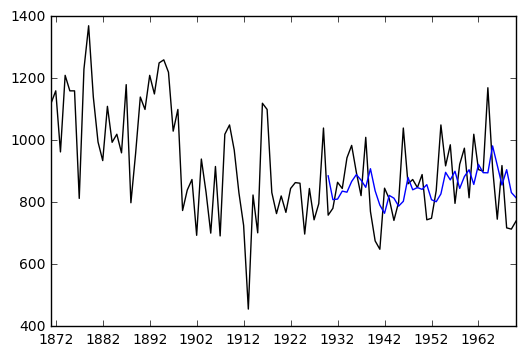

In [50]:
predictions_ARIMA=np.exp(pred.predicted_mean)
plt.plot(vol_data,'black')
plt.plot(predictions_ARIMA)

#  Try dynamic True. It only uses information from the time series up to a certain point, and after that, forecasts are generated using values from previous forecasted time points.

In [51]:
pred_dynamic = results.get_prediction(start='1950-01-01', dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

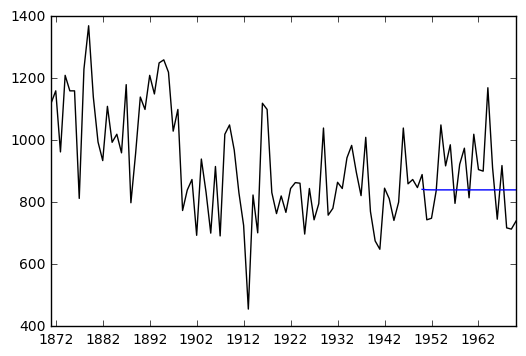

In [52]:
predictions_ARIMA=np.exp(pred_dynamic.predicted_mean)

plt.plot(vol_data, 'black')
plt.plot(predictions_ARIMA)

Accumulation of errors in dynamic forecasting makes it a poor choice in predicting future values since it plateaus quickly. ARIMA/SARIMA models don't seem to work too well on this Nile river dataset due to lack of strong trend or seasonality.